# Displacement Between cluster groups

Instead of finding the displacement of individual clusters, we now make it such that the distance between vertexes is detected instead. This takes in 3 parameters right now. 

Parameters we take in are: name of the organ 
the number of clusters we want


In [29]:
# Imports

import numpy as np
import matplotlib.pyplot as plt
from cellpose import io
from pathlib import Path
import os
import pandas as pd
from Functions_Used import GetPointsList, GetVertexList, GetClusters, ShowClusterPlot
from Functions_Used import specificOutline, findVertex, dist, getROIName # gets you specific Outlines
from PIL import Image
# List of Files
# Importing all the files
# the folder containing the .npy and png (or .tif files) are stored 
npyDir = "Haltere" # CHANGE THIS
numOfClusters = 7 # This is the number of vertexes that are there

roi_name, files, dir, maskList = getROIName(npyDir)


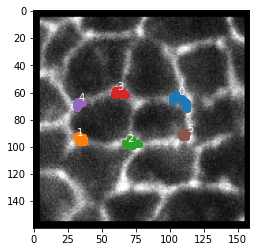

In [30]:
pointsList, M, O = GetPointsList(roi_name, dir)
mainVertexList = GetVertexList(roi_name, pointsList, maskList)
allx = GetClusters(numOfClusters, mainVertexList)
ShowClusterPlot(allx, files, "white") # if the number is not clear, change the color to smth visible

# from the image chose the vertex number that you want

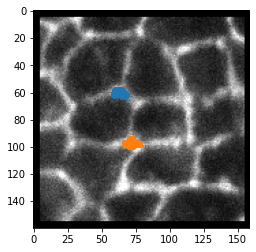

In [33]:
vert1 = 3
vert2 = 2
clus1 = allx.loc[allx["clusterNum"] == vert1] # select the cluster you want to look at
clus2 = allx.loc[allx["clusterNum"] == vert2] # select the cluster you want to look at 
f, ax = plt.subplots()
ax.scatter(clus1[1], clus1[0])
ax.scatter(clus2[1], clus2[0])
plt.imshow(Image.open(files[0]))

In [34]:
displacement = []
X1, X2, Y1, Y2 = ([] for i in range(4))
fnum = []

for k in range(max(max(clus1["frame"]), max(clus2["frame"]))):
    a = clus1.loc[clus1["frame"] == k]
    b = clus2.loc[clus2["frame"] == k]
    if len(a) > 0 and len(b) > 0: 
        fnum.append(k)
        X1.append(a.mean()[0])
        Y1.append(a.mean()[1])
        X2.append(b.mean()[0])
        Y2.append(b.mean()[1])
        
X1 = np.array(X1)
X2 = np.array(X2)
Y1 = np.array(Y1)
Y2 = np.array(Y2)

displacement = np.sqrt((Y2 - Y1)**2 + (X2- X1)**2)


In [35]:
import scipy.optimize

stepsize = (0.823 - 0.549)/2
tempX = np.arange(0.549, stepsize * (len(displacement) + 1), stepsize).tolist()
bigX = [ 0.549/3 * i for i in range(3)]
bigX = bigX + tempX
len(bigX)


def expon(t, a, b, c): 
    return a*t**b + c
    
A = scipy.optimize.curve_fit(expon,  bigX,  displacement)
a, b, c = A[0]
nY = []
for i in bigX:
    nY.append(expon(i, a, b, c))

Text(0, 0.5, 'Displacement ($\\mu$m)')

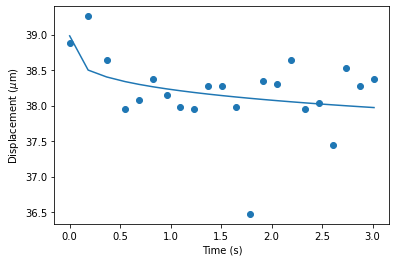

In [36]:
plt.scatter(bigX, displacement)
plt.plot(bigX, nY)
plt.xlabel("Time (s)")
plt.ylabel("Displacement" + r' ($\mu$m)')